# Hierachisches Clustering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [4]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
from scipy.cluster.hierarchy import linkage, fcluster

## I) Für Gesamtverlauf (-25 bis 275°C)

In [6]:
file_path = "data/030_dsc_experiments.csv"

In [7]:
df_experiments = pd.read_csv(file_path, index_col=0)
df_experiments

,L001_S3,L001_S5,L002_S3,L002_S5,L003_S3,L003_S5,L004_S3,L004_S5,L005_S3,L005_S5,...,L383_S3,L383_S5,L384_S3,L384_S5,L385_S3,L385_S5,L386_S3,L386_S5,L387_S3,L387_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-24,-0.21989,0.16598,-0.20426,0.15589,-0.21713,0.15900,-0.19927,0.16244,-0.22834,0.17739,...,-0.18067,0.17461,-0.21344,0.19298,-0.19186,0.18028,-0.20261,0.19231,-0.20920,0.19564
-23,-0.22134,0.16647,-0.20408,0.15648,-0.21732,0.15971,-0.20029,0.16288,-0.22837,0.17797,...,-0.18135,0.17530,-0.21442,0.19361,-0.19282,0.18083,-0.20349,0.19302,-0.21002,0.19661
-22,-0.22069,0.16703,-0.20420,0.15707,-0.21706,0.16041,-0.20056,0.16350,-0.22794,0.17882,...,-0.18193,0.17578,-0.21536,0.19430,-0.19367,0.18136,-0.20438,0.19379,-0.21093,0.19738
-21,-0.22040,0.16769,-0.20415,0.15773,-0.21713,0.16099,-0.20061,0.16419,-0.22836,0.17962,...,-0.18263,0.17655,-0.21599,0.19511,-0.19413,0.18202,-0.20510,0.19448,-0.21164,0.19795
-20,-0.22059,0.16849,-0.20421,0.15857,-0.21691,0.16159,-0.20101,0.16484,-0.22840,0.18030,...,-0.18334,0.17710,-0.21663,0.19593,-0.19459,0.18269,-0.20588,0.19512,-0.21252,0.19866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,-0.14800,0.30041,-0.15145,0.28398,-0.15596,0.29227,-0.16994,0.29114,-0.17889,0.31237,...,-0.20089,0.34542,-0.19769,0.42751,-0.21116,0.35646,-0.21207,0.38997,-0.21226,0.41070
271,-0.14738,0.30087,-0.14924,0.28462,-0.15565,0.29285,-0.16835,0.29161,-0.17823,0.31277,...,-0.20402,0.34589,-0.19540,0.42880,-0.21123,0.35731,-0.21093,0.39048,-0.21260,0.41161
272,-0.14694,0.30134,-0.14925,0.28520,-0.15352,0.29349,-0.16734,0.29197,-0.17898,0.31313,...,-0.20251,0.34632,-0.19537,0.42980,-0.21137,0.35797,-0.21101,0.39123,-0.21037,0.41242


In [8]:
df_dsc = pd.read_csv("data/010_dsc.csv", index_col=0)
df_dsc.head()

,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Masse Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
Nummer,,,,,,,,,
L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.34,5.675,130.7
L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,8.49,4.522,130.8
L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,NaN,7.86,5.084,130.7
L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.59,4.175,130.3
L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,NaN,8.39,5.796,130.5


### 1) Spalten filtern, die "_S5" enthalten

In [9]:
columns_s5 = [col for col in df_experiments.columns if "_S5" in col]
df_s5 = df_experiments[columns_s5]
df_s5

,L001_S5,L002_S5,L003_S5,L004_S5,L005_S5,L006_S5,L007_S5,L008_S5,L009_S5,L010_S5,...,L378_S5,L379_S5,L380_S5,L381_S5,L382_S5,L383_S5,L384_S5,L385_S5,L386_S5,L387_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-24,0.16598,0.15589,0.15900,0.16244,0.17739,0.15898,0.19158,0.12865,0.16992,0.15554,...,0.18864,0.17923,0.16501,0.17974,0.19352,0.17461,0.19298,0.18028,0.19231,0.19564
-23,0.16647,0.15648,0.15971,0.16288,0.17797,0.15965,0.19234,0.12905,0.17126,0.15602,...,0.18901,0.17957,0.16534,0.18038,0.19412,0.17530,0.19361,0.18083,0.19302,0.19661
-22,0.16703,0.15707,0.16041,0.16350,0.17882,0.16053,0.19321,0.12990,0.17218,0.15668,...,0.18936,0.17976,0.16552,0.18118,0.19484,0.17578,0.19430,0.18136,0.19379,0.19738
-21,0.16769,0.15773,0.16099,0.16419,0.17962,0.16126,0.19418,0.13042,0.17261,0.15750,...,0.18964,0.18014,0.16566,0.18214,0.19572,0.17655,0.19511,0.18202,0.19448,0.19795
-20,0.16849,0.15857,0.16159,0.16484,0.18030,0.16198,0.19513,0.13134,0.17323,0.15821,...,0.19009,0.18050,0.16584,0.18279,0.19643,0.17710,0.19593,0.18269,0.19512,0.19866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.30041,0.28398,0.29227,0.29114,0.31237,0.29696,0.35333,0.24355,0.29402,0.27868,...,0.32401,0.28104,0.23809,0.38291,0.40321,0.34542,0.42751,0.35646,0.38997,0.41070
271,0.30087,0.28462,0.29285,0.29161,0.31277,0.29735,0.35370,0.24381,0.29462,0.27920,...,0.32388,0.28115,0.23848,0.38371,0.40416,0.34589,0.42880,0.35731,0.39048,0.41161
272,0.30134,0.28520,0.29349,0.29197,0.31313,0.29766,0.35416,0.24410,0.29504,0.27958,...,0.32438,0.28137,0.23848,0.38417,0.40468,0.34632,0.42980,0.35797,0.39123,0.41242


### 2) Transponieren der Daten

In [10]:
df_transposed = df_s5.T
df_transposed.index.name = "Probe"
df_transposed

Temp./°C,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,265,266,267,268,269,270,271,272,273,274
Probe,,,,,,,,,,,,,,,,,,,,,
L001_S5,0.16598,0.16647,0.16703,0.16769,0.16849,0.16941,0.17032,0.17102,0.17178,0.17254,...,0.29814,0.29860,0.29916,0.29962,0.29997,0.30041,0.30087,0.30134,0.30176,0.30208
L002_S5,0.15589,0.15648,0.15707,0.15773,0.15857,0.15938,0.16007,0.16075,0.16136,0.16197,...,0.28168,0.28186,0.28194,0.28254,0.28331,0.28398,0.28462,0.28520,0.28576,0.28632
L003_S5,0.15900,0.15971,0.16041,0.16099,0.16159,0.16235,0.16326,0.16409,0.16478,0.16552,...,0.29036,0.29080,0.29114,0.29160,0.29191,0.29227,0.29285,0.29349,0.29423,0.29483
L004_S5,0.16244,0.16288,0.16350,0.16419,0.16484,0.16537,0.16586,0.16652,0.16710,0.16775,...,0.28940,0.28977,0.29003,0.29022,0.29056,0.29114,0.29161,0.29197,0.29250,0.29303
L005_S5,0.17739,0.17797,0.17882,0.17962,0.18030,0.18107,0.18185,0.18259,0.18326,0.18384,...,0.30882,0.30952,0.31026,0.31106,0.31175,0.31237,0.31277,0.31313,0.31342,0.31377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383_S5,0.17461,0.17530,0.17578,0.17655,0.17710,0.17775,0.17851,0.17928,0.17998,0.18071,...,0.34274,0.34322,0.34391,0.34440,0.34479,0.34542,0.34589,0.34632,0.34696,0.34756
L384_S5,0.19298,0.19361,0.19430,0.19511,0.19593,0.19666,0.19737,0.19813,0.19896,0.19966,...,0.42369,0.42477,0.42549,0.42639,0.42688,0.42751,0.42880,0.42980,0.43046,0.43096
L385_S5,0.18028,0.18083,0.18136,0.18202,0.18269,0.18333,0.18412,0.18486,0.18551,0.18612,...,0.35376,0.35416,0.35474,0.35533,0.35604,0.35646,0.35731,0.35797,0.35851,0.35839


In [11]:
# Kopie der Indizes von df_transposed ohne den Suffix '_S5'
df_transposed.index = df_transposed.index.str.replace('_S5', '', regex=False)

# Sicherstellen, dass die Indizes übereinstimmen (z.B., Typ als String)
df_transposed.index = df_transposed.index.astype(str)
df_dsc.index = df_dsc.index.astype(str)

# Left Merge basierend auf den transformierten Indizes
df_merged = df_transposed.merge(df_dsc[['dHm_J/g', 'Tm_C']], 
                                left_index=True, 
                                right_index=True, 
                                how='left')

# Entferne alle Zeilen mit NaN-Werten
df_merged = df_merged.dropna()

# Konvertiere alle Spaltennamen in Strings
df_merged.columns = df_merged.columns.astype(str)

df_merged

,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,267,268,269,270,271,272,273,274,dHm_J/g,Tm_C
Probe,,,,,,,,,,,,,,,,,,,,,
L001,0.16598,0.16647,0.16703,0.16769,0.16849,0.16941,0.17032,0.17102,0.17178,0.17254,...,0.29916,0.29962,0.29997,0.30041,0.30087,0.30134,0.30176,0.30208,5.675,130.7
L002,0.15589,0.15648,0.15707,0.15773,0.15857,0.15938,0.16007,0.16075,0.16136,0.16197,...,0.28194,0.28254,0.28331,0.28398,0.28462,0.28520,0.28576,0.28632,4.522,130.8
L003,0.15900,0.15971,0.16041,0.16099,0.16159,0.16235,0.16326,0.16409,0.16478,0.16552,...,0.29114,0.29160,0.29191,0.29227,0.29285,0.29349,0.29423,0.29483,5.084,130.7
L004,0.16244,0.16288,0.16350,0.16419,0.16484,0.16537,0.16586,0.16652,0.16710,0.16775,...,0.29003,0.29022,0.29056,0.29114,0.29161,0.29197,0.29250,0.29303,4.175,130.3
L005,0.17739,0.17797,0.17882,0.17962,0.18030,0.18107,0.18185,0.18259,0.18326,0.18384,...,0.31026,0.31106,0.31175,0.31237,0.31277,0.31313,0.31342,0.31377,5.796,130.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L371,1.26133,1.26054,1.25924,1.25701,1.25813,1.26028,1.26231,1.26509,1.26950,1.26958,...,1.13066,1.13142,1.12926,1.12622,1.12498,1.12272,1.12071,1.12140,147.800,130.5
L372,1.95339,1.95016,1.94929,1.95892,1.95730,1.96705,1.97285,1.97126,1.97276,1.97508,...,1.88885,1.88805,1.88931,1.88754,1.88492,1.88445,1.88692,1.88695,150.600,130.5
L373,1.74905,1.75693,1.77223,1.78680,1.80083,1.81365,1.82517,1.83705,1.84741,1.85233,...,2.51679,2.51899,2.52221,2.52134,2.52184,2.52405,2.52337,2.52885,144.900,130.6


### 3) Normalisierung der Daten

In [12]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_merged)

# Umwandlung zurück in einen DataFrame für bessere Nachvollziehbarkeit
df_normalized = pd.DataFrame(data_normalized, index=df_merged.index, columns=df_merged.columns)
df_normalized

,-24,-23,-22,-21,-20,-19,-18,-17,-16,-15,...,267,268,269,270,271,272,273,274,dHm_J/g,Tm_C
Probe,,,,,,,,,,,,,,,,,,,,,
L001,-0.481198,-0.481105,-0.480971,-0.480529,-0.479834,-0.479023,-0.478169,-0.477793,-0.477317,-0.476654,...,-0.340488,-0.339965,-0.339555,-0.339066,-0.338432,-0.337860,-0.337263,-0.336751,-0.269418,0.050186
L002,-0.499495,-0.499154,-0.498858,-0.498303,-0.497417,-0.496685,-0.496126,-0.495691,-0.495390,-0.494928,...,-0.363402,-0.362669,-0.361672,-0.360862,-0.359963,-0.359221,-0.358418,-0.357563,-0.302170,0.058680
L003,-0.493855,-0.493319,-0.492860,-0.492485,-0.492064,-0.491455,-0.490537,-0.489870,-0.489458,-0.488791,...,-0.351160,-0.350626,-0.350255,-0.349865,-0.349059,-0.348249,-0.347219,-0.346325,-0.286206,0.050186
L004,-0.487617,-0.487591,-0.487311,-0.486775,-0.486304,-0.486137,-0.485982,-0.485635,-0.485434,-0.484936,...,-0.352637,-0.352460,-0.352047,-0.351364,-0.350702,-0.350261,-0.349507,-0.348702,-0.312026,0.016208
L005,-0.460508,-0.460328,-0.459798,-0.459240,-0.458900,-0.458490,-0.457970,-0.457630,-0.457406,-0.457118,...,-0.325717,-0.324757,-0.323916,-0.323201,-0.322664,-0.322256,-0.321846,-0.321314,-0.265981,0.033197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L371,1.505025,1.495544,1.480458,1.463349,1.451590,1.441975,1.434870,1.428830,1.426600,1.419967,...,0.765973,0.765755,0.761411,0.756435,0.753531,0.749234,0.745555,0.745186,3.767691,0.033197
L372,2.759953,2.741476,2.719674,2.715898,2.690893,2.686580,2.679654,2.659464,2.646355,2.639672,...,1.774882,1.771551,1.770454,1.766385,1.760467,1.757382,1.758641,1.756119,3.847226,0.033197
L373,2.389418,2.392368,2.401703,2.408752,2.413545,2.416446,2.420935,2.425578,2.428944,2.427456,...,2.610470,2.610266,2.610692,2.607170,2.604399,2.603890,2.600157,2.603768,3.685315,0.041691


### 4) Anwendung des Hierarchischen Clusterings

In [13]:
linked = linkage(df_normalized, method="ward")

### 5) Visualisierung

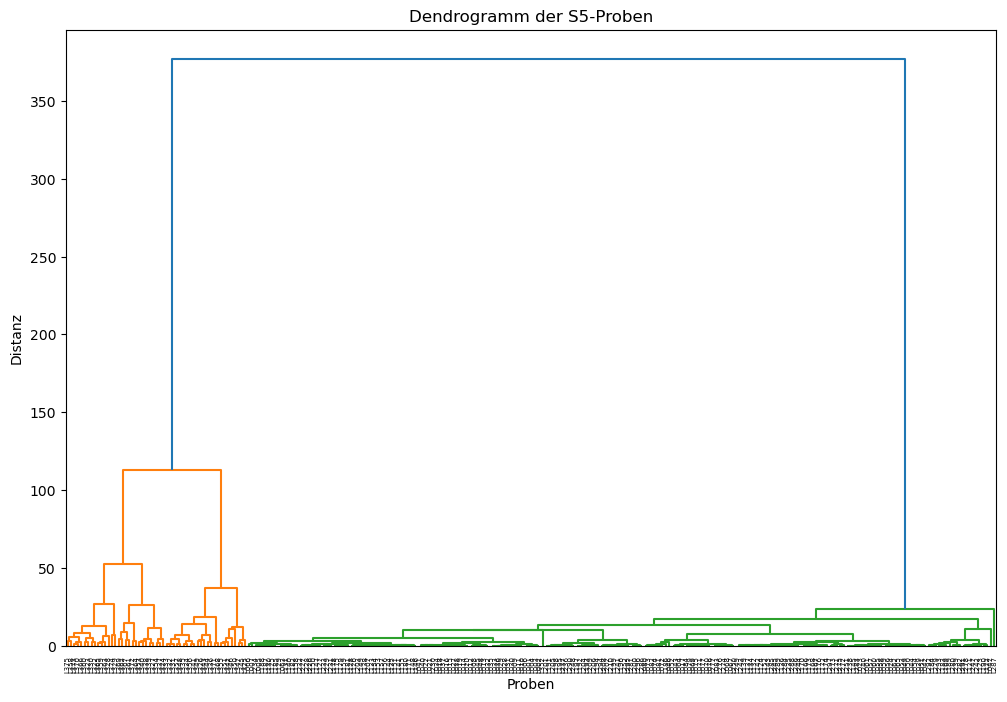

In [14]:
plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    labels=df_normalized.index,  # Proben als Beschriftungen
    orientation="top",
    distance_sort="descending",
)
plt.title("Dendrogramm der S5-Proben")
plt.xlabel("Proben")
plt.ylabel("Distanz")
plt.show()

### 6) Clusterzuordnung berechnen

#### a) Feste Anzahl an Clustern
> 5 Cluster (da 5 Sedimente/Matritzen)

In [15]:
cluster_model = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
cluster_labels = cluster_model.fit_predict(df_normalized)

In [16]:
# Cluster-Zuweisung als DataFrame
cluster_assignments = pd.DataFrame({
    "Probe": df_normalized.index,
    "Cluster": cluster_labels
})
cluster_assignments

,Probe,Cluster
0,L001,3
1,L002,3
2,L003,3
3,L004,3
4,L005,3
...,...,...
267,L371,2
268,L372,1
269,L373,0
270,L374,0


In [17]:
cluster_assignments["Cluster"].value_counts()

Cluster
3    219
2     16
0     15
1     14
4      8
Name: count, dtype: int64

#### b) Basieren auf gegebenen Cutoff Point (Distanzschwelle) 
> aus Dendogramm

In [18]:
cutoff_distance = 40  # Beispiel für den Cutoff Point
clusters = fcluster(linked, t=cutoff_distance, criterion="distance")

In [19]:
# Cluster in DataFrame speichern
cluster_results = pd.DataFrame({
    "Probe": df_normalized.index,
    "Cluster": clusters.flatten()  # `cut_tree` gibt ein 2D-Array zurück
})
cluster_results

,Probe,Cluster
0,L001,1
1,L002,1
2,L003,1
3,L004,1
4,L005,1
...,...,...
267,L371,2
268,L372,3
269,L373,4
270,L374,4


In [20]:
cluster_results["Cluster"].value_counts()

Cluster
1    219
2     24
4     15
3     14
Name: count, dtype: int64

In [21]:
cluster_results.to_csv("data/070_simple_clustering.csv", index=True)

## II) Basierend auf Intervallen (Mittelwerten)
> eine Cluster-Zuweisung für Gesamtverlauf

In [22]:
def get_interval_means(dataframe, interval_size=20, start_temp=-25):
    """
    Berechnet die Mittelwerte für jede Probe in definierten Temperaturintervallen.
    
    Args:
        dataframe (pd.DataFrame): Der Eingabe-DataFrame mit Temperaturen als Index und Spalten für die Proben.
        interval_size (int): Größe der Intervalle in Grad Celsius (Standard: 20).
        start_temp (int): Startwert des ersten Intervalls (Standard: -25).
        
    Returns:
        pd.DataFrame: DataFrame mit Mittelwerten für jede Probe in den definierten Intervallen.
    """
    # Intervallbildung
    temperature_intervals = pd.interval_range(
        start=start_temp,
        end=dataframe.index.max(),
        freq=interval_size,
        closed="left"
    )
    
    # Initialisiere eine Liste für alle Spaltenergebnisse
    results = []

    # Iteriere über jede Spalte (Probe) im DataFrame
    for column in dataframe.columns:
        # Gruppieren der Daten in den Intervallen und Berechnung des Mittelwerts
        interval_groups = pd.cut(dataframe.index, bins=temperature_intervals)
        interval_means = dataframe.groupby(interval_groups, observed=False)[column].mean()
        results.append(interval_means.rename(column))

    # Zusammenführen aller Ergebnisse
    interval_means_df = pd.concat(results, axis=1)

    return interval_means_df


### 1) Filtern, Transponieren und Normalisieren

In [23]:
df_mean = get_interval_means(df_experiments)
df_mean

,L001_S3,L001_S5,L002_S3,L002_S5,L003_S3,L003_S5,L004_S3,L004_S5,L005_S3,L005_S5,...,L383_S3,L383_S5,L384_S3,L384_S5,L385_S3,L385_S5,L386_S3,L386_S5,L387_S3,L387_S5
"[-25, -5)",-0.221112,0.172326,-0.205552,0.161861,-0.217446,0.165265,-0.203160,0.167598,-0.229395,0.183746,...,-0.185763,0.180739,-0.218876,0.199864,-0.197058,0.186128,-0.208451,0.198827,-0.214898,0.202518
"[-5, 15)",-0.222391,0.184434,-0.208597,0.173220,-0.218317,0.176634,-0.210021,0.176822,-0.232642,0.193985,...,-0.192784,0.193854,-0.224934,0.214784,-0.204220,0.198900,-0.215988,0.212361,-0.221708,0.217046
"[15, 35)",-0.223774,0.195057,-0.210795,0.182833,-0.219620,0.186115,-0.215985,0.185623,-0.235321,0.203929,...,-0.197842,0.204304,-0.228608,0.228201,-0.209650,0.209644,-0.220986,0.223437,-0.226108,0.228796
"[35, 55)",-0.224060,0.205159,-0.211849,0.192717,-0.219910,0.196306,-0.219486,0.195226,-0.237079,0.215435,...,-0.202655,0.215396,-0.231991,0.242314,-0.214711,0.221292,-0.225317,0.235316,-0.230577,0.241742
"[55, 75)",-0.222921,0.214521,-0.211698,0.201594,-0.219371,0.204810,-0.221141,0.202805,-0.237988,0.225502,...,-0.207099,0.225731,-0.234080,0.255385,-0.219724,0.233013,-0.229637,0.247690,-0.234912,0.254777
"[75, 95)",-0.222413,0.222849,-0.212150,0.209597,-0.219536,0.212151,-0.222818,0.209616,-0.239287,0.234904,...,-0.211281,0.236778,-0.236580,0.269220,-0.225185,0.244917,-0.234303,0.260484,-0.238989,0.268400
"[95, 115)",-0.229198,0.234423,-0.217875,0.220478,-0.225630,0.223040,-0.228474,0.219889,-0.247436,0.247689,...,-0.217143,0.248431,-0.240008,0.284138,-0.232669,0.258350,-0.240949,0.274697,-0.246002,0.284046
"[115, 135)",-0.240495,0.278015,-0.226743,0.257292,-0.236553,0.264224,-0.238262,0.255498,-0.260744,0.292096,...,-0.223062,0.270078,-0.244159,0.312207,-0.241776,0.287733,-0.248721,0.304550,-0.254307,0.316254
"[135, 155)",-0.202797,0.240712,-0.195931,0.229272,-0.201927,0.230814,-0.208312,0.229366,-0.222836,0.254880,...,-0.214613,0.270338,-0.231419,0.314013,-0.228524,0.280902,-0.235505,0.299731,-0.239346,0.311720
"[155, 175)",-0.195022,0.249861,-0.189470,0.238232,-0.195209,0.240069,-0.202433,0.238818,-0.216275,0.263652,...,-0.214827,0.281833,-0.229427,0.330276,-0.228580,0.293086,-0.234504,0.313407,-0.238319,0.326633


In [24]:
# Spalten filtern, die "_S5" enthalten
columns_s5 = [col for col in df_mean.columns if "_S5" in col]
df_s5 = df_mean[columns_s5]
df_s5.head()

,L001_S5,L002_S5,L003_S5,L004_S5,L005_S5,L006_S5,L007_S5,L008_S5,L009_S5,L010_S5,...,L378_S5,L379_S5,L380_S5,L381_S5,L382_S5,L383_S5,L384_S5,L385_S5,L386_S5,L387_S5
"[-25, -5)",0.172326,0.161861,0.165265,0.167598,0.183746,0.165140,0.199063,0.134456,0.176671,0.161580,...,0.192787,0.182729,0.167526,0.186805,0.200601,0.180739,0.199864,0.186128,0.198827,0.202518
"[-5, 15)",0.184434,0.173220,0.176634,0.176822,0.193985,0.175487,0.212373,0.144850,0.187165,0.171918,...,0.202186,0.191209,0.173792,0.201327,0.215115,0.193854,0.214784,0.198900,0.212361,0.217046
"[15, 35)",0.195057,0.182833,0.186115,0.185623,0.203929,0.185142,0.225708,0.156201,0.198274,0.182377,...,0.209938,0.197792,0.178366,0.213746,0.226833,0.204304,0.228201,0.209644,0.223437,0.228796
"[35, 55)",0.205159,0.192717,0.196306,0.195226,0.215435,0.196011,0.239901,0.167813,0.209123,0.193339,...,0.219274,0.205860,0.184329,0.226926,0.239065,0.215396,0.242314,0.221292,0.235316,0.241742
"[55, 75)",0.214521,0.201594,0.204810,0.202805,0.225502,0.205616,0.252659,0.178388,0.219319,0.202847,...,0.228423,0.212919,0.189571,0.240148,0.250975,0.225731,0.255385,0.233013,0.247690,0.254777


In [25]:
df_transposed = df_s5.T
df_transposed.index.name = "Probe"
df_transposed

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)"
Probe,,,,,,,,,,,,,,,
L001_S5,0.172326,0.184434,0.195057,0.205159,0.214521,0.222849,0.234423,0.278015,0.240712,0.249861,0.259362,0.268452,0.278189,0.288377,0.297901
L002_S5,0.161861,0.173220,0.182833,0.192717,0.201594,0.209597,0.220478,0.257292,0.229272,0.238232,0.247555,0.255795,0.264224,0.273023,0.281533
L003_S5,0.165265,0.176634,0.186115,0.196306,0.204810,0.212151,0.223040,0.264224,0.230814,0.240069,0.250235,0.259529,0.269369,0.279809,0.289801
L004_S5,0.167598,0.176822,0.185623,0.195226,0.202805,0.209616,0.219889,0.255498,0.229366,0.238818,0.249369,0.259470,0.269852,0.279357,0.288853
L005_S5,0.183746,0.193985,0.203929,0.215435,0.225502,0.234904,0.247689,0.292096,0.254880,0.263652,0.273058,0.281772,0.291353,0.300517,0.309291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383_S5,0.180739,0.193854,0.204304,0.215396,0.225731,0.236778,0.248431,0.270078,0.270338,0.281833,0.293697,0.306554,0.319510,0.331680,0.342446
L384_S5,0.199864,0.214784,0.228201,0.242314,0.255385,0.269220,0.284138,0.312207,0.314013,0.330276,0.347313,0.365731,0.385093,0.406559,0.423512
L385_S5,0.186128,0.198900,0.209644,0.221292,0.233013,0.244917,0.258350,0.287733,0.280902,0.293086,0.305258,0.317933,0.329628,0.342111,0.353359


In [26]:
# Kopie der Indizes von df_transposed ohne den Suffix '_S5'
df_transposed.index = df_transposed.index.str.replace('_S5', '', regex=False)

# Sicherstellen, dass die Indizes übereinstimmen (z.B., Typ als String)
df_transposed.index = df_transposed.index.astype(str)
df_dsc.index = df_dsc.index.astype(str)

# Left Merge basierend auf den transformierten Indizes
df_merged = df_transposed.merge(df_dsc[['dHm_J/g', 'Tm_C']], 
                                left_index=True, 
                                right_index=True, 
                                how='left')

# Entferne alle Zeilen mit NaN-Werten
df_merged = df_merged.dropna()

# Konvertiere alle Spaltennamen in Strings
df_merged.columns = df_merged.columns.astype(str)

df_merged

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)",dHm_J/g,Tm_C
Probe,,,,,,,,,,,,,,,,,
L001,0.172326,0.184434,0.195057,0.205159,0.214521,0.222849,0.234423,0.278015,0.240712,0.249861,0.259362,0.268452,0.278189,0.288377,0.297901,5.675,130.7
L002,0.161861,0.173220,0.182833,0.192717,0.201594,0.209597,0.220478,0.257292,0.229272,0.238232,0.247555,0.255795,0.264224,0.273023,0.281533,4.522,130.8
L003,0.165265,0.176634,0.186115,0.196306,0.204810,0.212151,0.223040,0.264224,0.230814,0.240069,0.250235,0.259529,0.269369,0.279809,0.289801,5.084,130.7
L004,0.167598,0.176822,0.185623,0.195226,0.202805,0.209616,0.219889,0.255498,0.229366,0.238818,0.249369,0.259470,0.269852,0.279357,0.288853,4.175,130.3
L005,0.183746,0.193985,0.203929,0.215435,0.225502,0.234904,0.247689,0.292096,0.254880,0.263652,0.273058,0.281772,0.291353,0.300517,0.309291,5.796,130.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L371,1.267137,1.298024,1.307332,1.346205,1.397464,1.473697,1.681371,3.328000,1.321060,1.271679,1.244233,1.214994,1.189484,1.167405,1.134949,147.800,130.5
L372,1.968001,1.987500,1.984565,2.017205,2.072344,2.169024,2.418232,4.303387,1.982876,1.970677,1.947160,1.921479,1.913373,1.906359,1.891541,150.600,130.5
L373,1.845868,1.999838,2.089735,2.184030,2.274604,2.396145,2.657336,4.543626,2.314442,2.361513,2.377045,2.387663,2.427050,2.474957,2.508894,144.900,130.6


In [27]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df_transposed)

# Umwandlung zurück in einen DataFrame für bessere Nachvollziehbarkeit
df_normalized = pd.DataFrame(data_normalized, index=df_transposed.index, columns=df_transposed.columns)
df_normalized

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)"
Probe,,,,,,,,,,,,,,,
L001,-0.409775,-0.400449,-0.389641,-0.380218,-0.369950,-0.361466,-0.350984,-0.326757,-0.340201,-0.328247,-0.314883,-0.303720,-0.291783,-0.279244,-0.266946
L002,-0.430105,-0.420957,-0.411449,-0.401776,-0.391775,-0.383122,-0.372093,-0.346959,-0.358927,-0.347063,-0.333821,-0.323707,-0.313462,-0.302590,-0.291381
L003,-0.423493,-0.414713,-0.405592,-0.395556,-0.386346,-0.378948,-0.368215,-0.340201,-0.356403,-0.344092,-0.329523,-0.317811,-0.305474,-0.292270,-0.279037
L004,-0.418961,-0.414369,-0.406470,-0.397428,-0.389731,-0.383091,-0.372984,-0.348708,-0.358773,-0.346115,-0.330911,-0.317903,-0.304724,-0.292959,-0.280454
L005,-0.387591,-0.382980,-0.373814,-0.362412,-0.351413,-0.341765,-0.330902,-0.313030,-0.317008,-0.305931,-0.292917,-0.282687,-0.271345,-0.260785,-0.249944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383,-0.393431,-0.383219,-0.373145,-0.362479,-0.351026,-0.338704,-0.329780,-0.334494,-0.291703,-0.276513,-0.259814,-0.243557,-0.227633,-0.213402,-0.200450
L384,-0.356280,-0.344942,-0.330514,-0.315836,-0.300962,-0.285687,-0.275729,-0.293425,-0.220209,-0.198126,-0.173821,-0.150114,-0.125819,-0.099549,-0.079439
L385,-0.382964,-0.373991,-0.363618,-0.352263,-0.338732,-0.325401,-0.314765,-0.317284,-0.274411,-0.258304,-0.241273,-0.225589,-0.211926,-0.197541,-0.184160


### 2) Anwendung des Hierarchischen Clusterings

In [28]:
linked = linkage(df_normalized, method="ward")

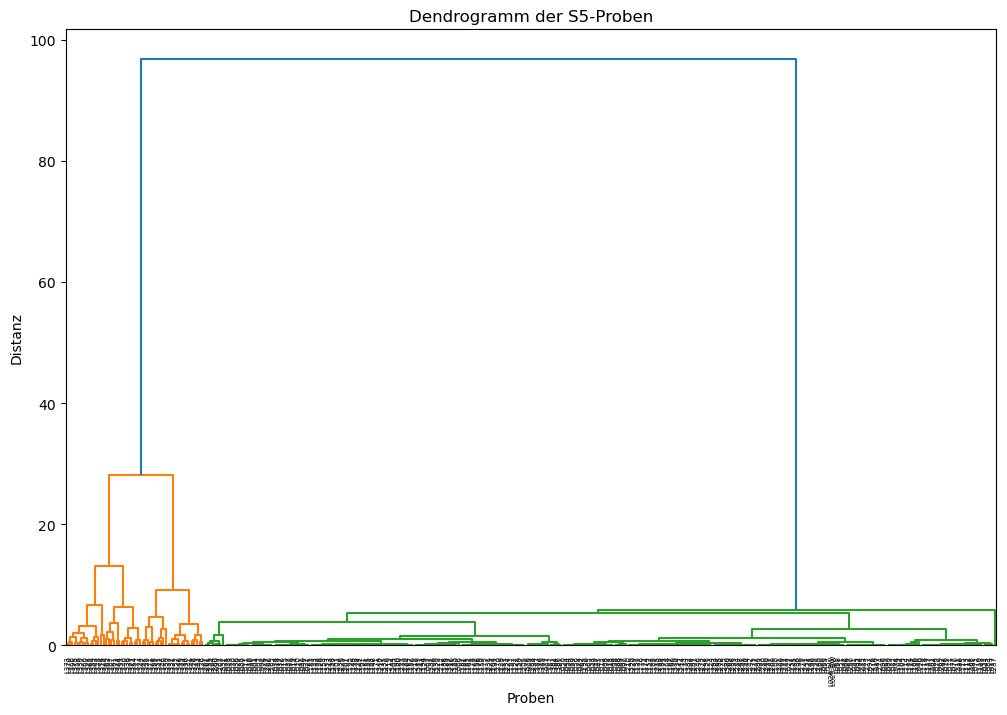

In [29]:
plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    labels=df_normalized.index,  # Proben als Beschriftungen
    orientation="top",
    distance_sort="descending",
)
plt.title("Dendrogramm der S5-Proben")
plt.xlabel("Proben")
plt.ylabel("Distanz")
plt.show()

### 3) Clusterzuordnung berechnen

#### a) Feste Anzahl an Clustern
> 5 Cluster (da 5 Sedimente/Matritzen)

In [30]:
cluster_model = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
cluster_labels = cluster_model.fit_predict(df_normalized)

# Cluster-Zuweisung als DataFrame
cluster_assignments = pd.DataFrame({
    "Probe": df_normalized.index,
    "Cluster": cluster_labels
})
cluster_assignments

,Probe,Cluster
0,L001,3
1,L002,3
2,L003,3
3,L004,3
4,L005,3
...,...,...
353,L383,3
354,L384,3
355,L385,3
356,L386,3


In [31]:
cluster_assignments["Cluster"].value_counts()

Cluster
3    305
0     15
1     14
4     14
2     10
Name: count, dtype: int64

#### b) Basieren auf gegebenen Cutoff Point (Distanzschwelle) 
> aus Dendogramm

In [32]:
cutoff_distance = 8  # Beispiel für den Cutoff Point
clusters = fcluster(linked, t=cutoff_distance, criterion="distance")


# Cluster in DataFrame speichern
cluster_results = pd.DataFrame({
    "Probe": df_normalized.index,
    "Cluster": clusters.flatten()  # `cut_tree` gibt ein 2D-Array zurück
})
cluster_results

,Probe,Cluster
0,L001,1
1,L002,1
2,L003,1
3,L004,1
4,L005,1
...,...,...
353,L383,1
354,L384,1
355,L385,1
356,L386,1


In [33]:
cluster_results["Cluster"].value_counts()

Cluster
1    305
5     15
4     14
2     14
3     10
Name: count, dtype: int64

In [34]:
cluster_results.to_csv("data/071_mean_clustering.csv", index=True)

## III) Basierend auf Intervallen (Mittelwerten)
> Pro Interval eine Cluster-Zuweisung

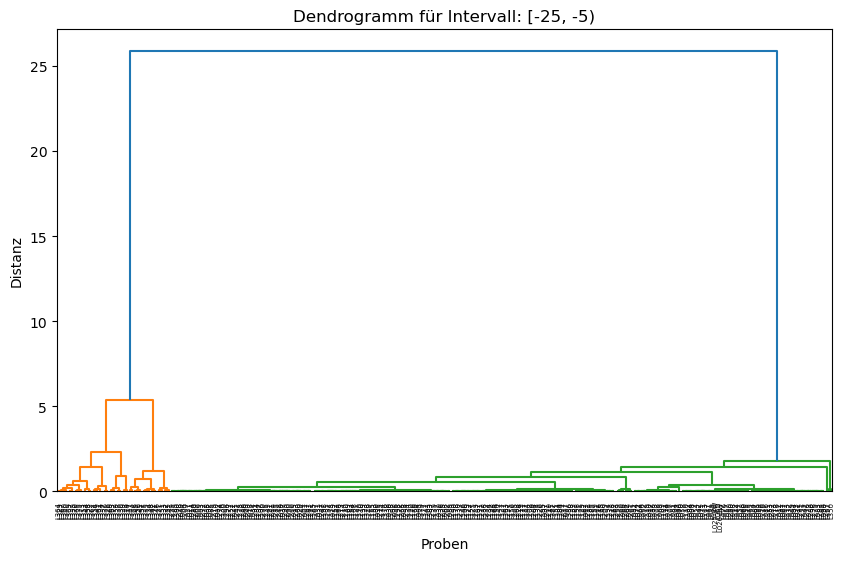

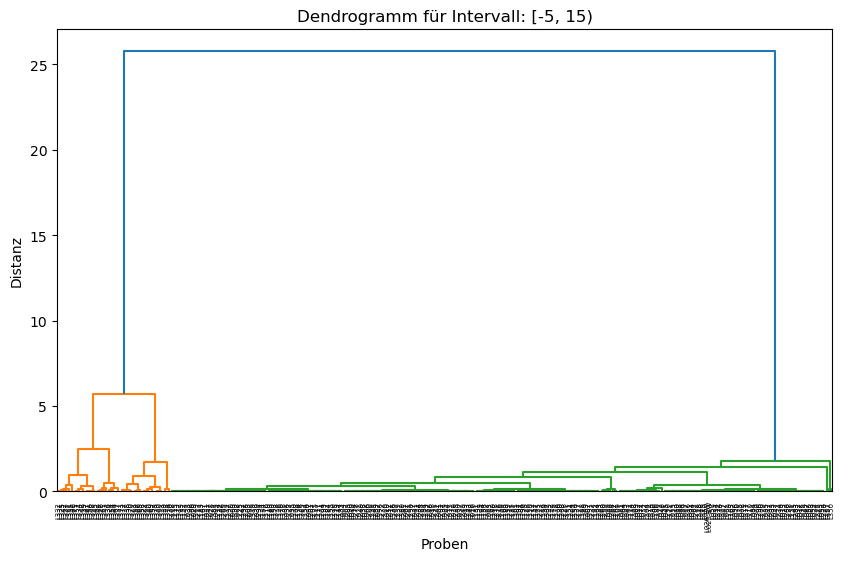

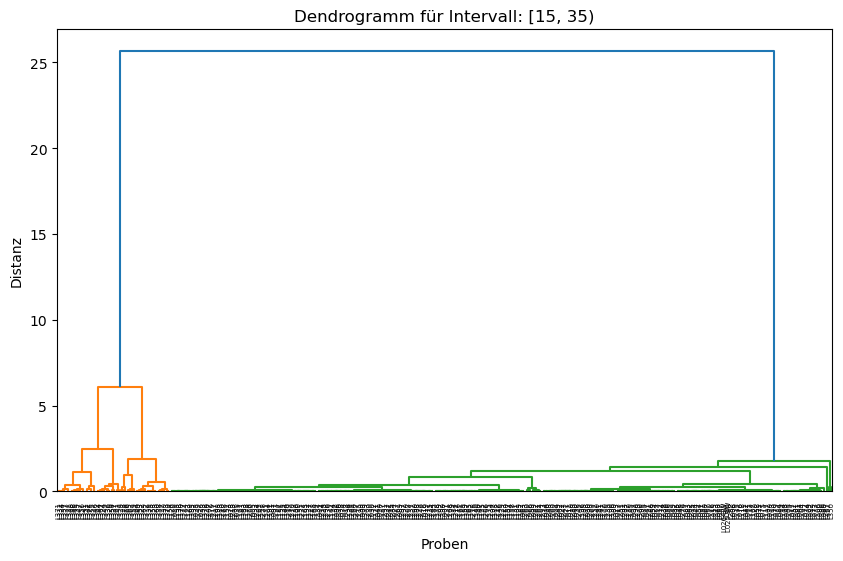

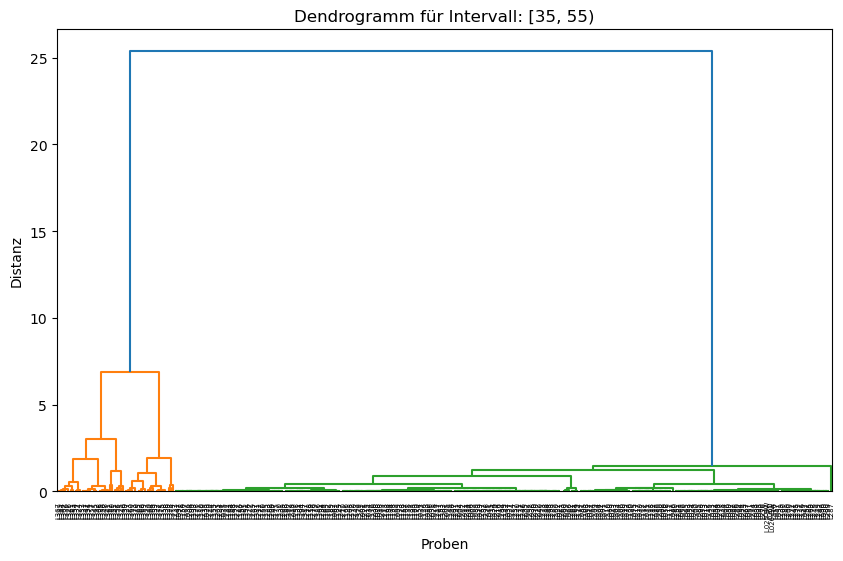

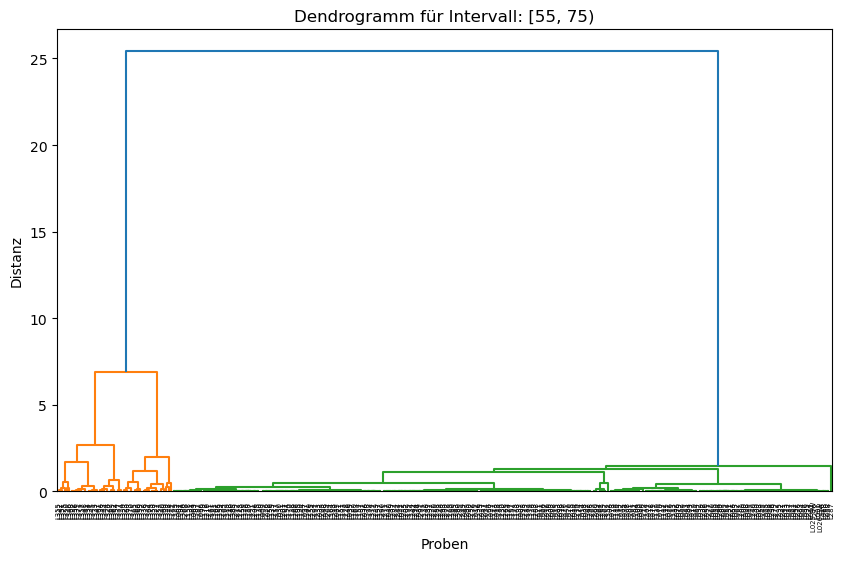

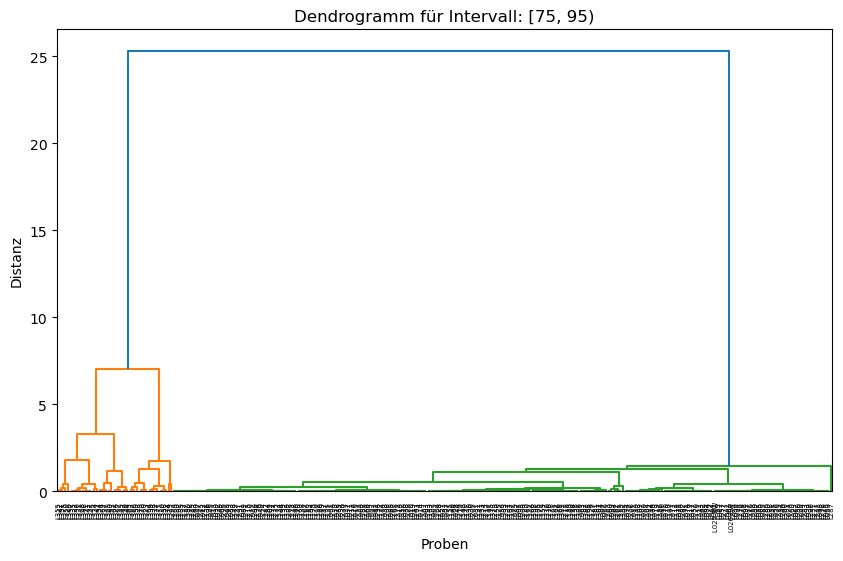

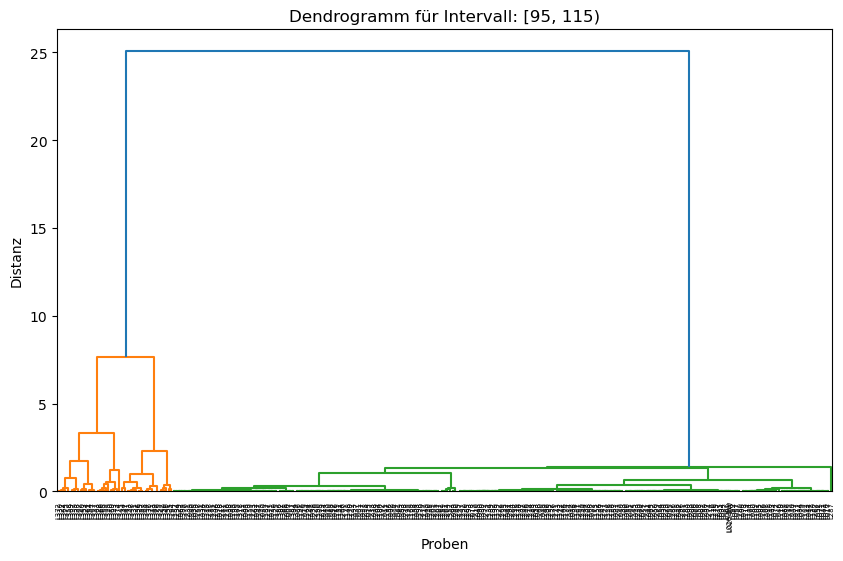

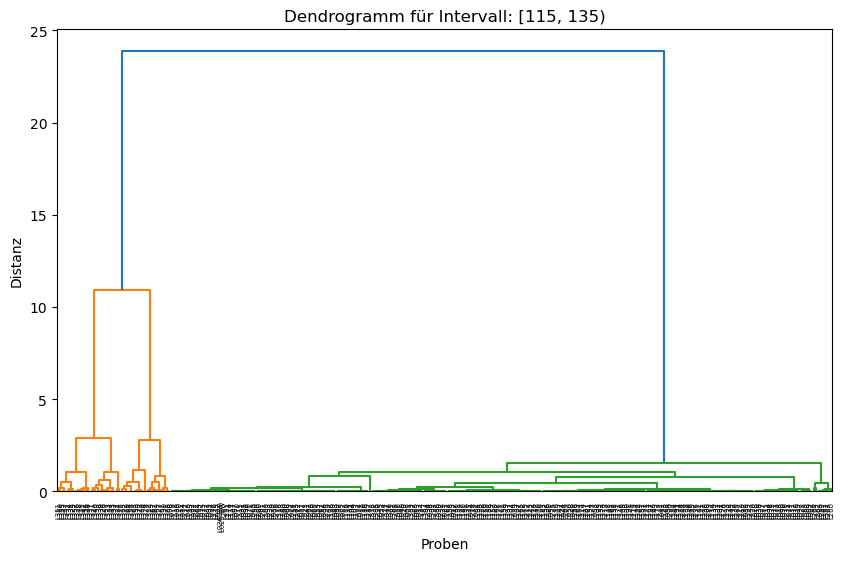

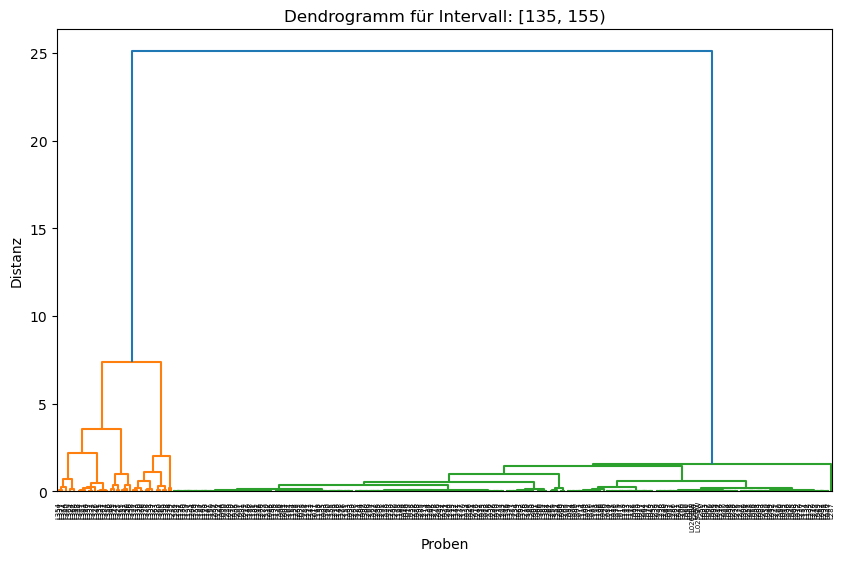

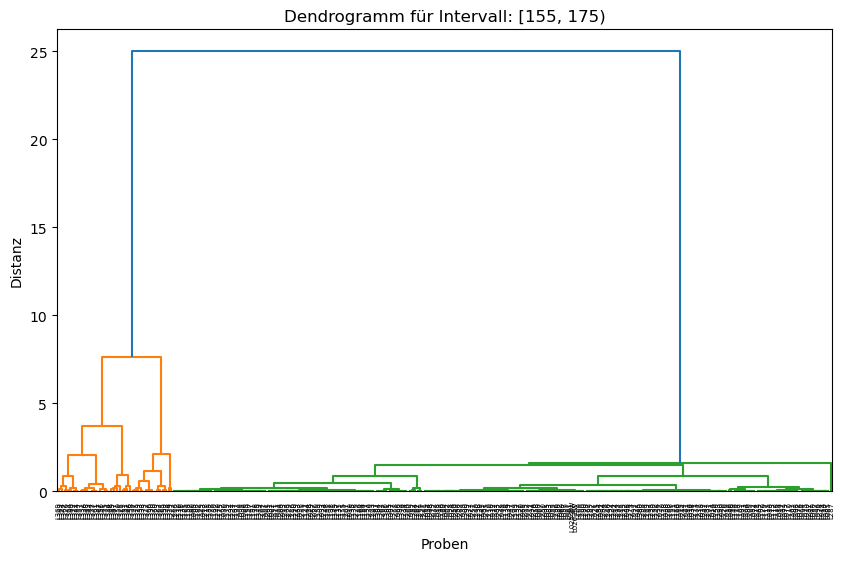

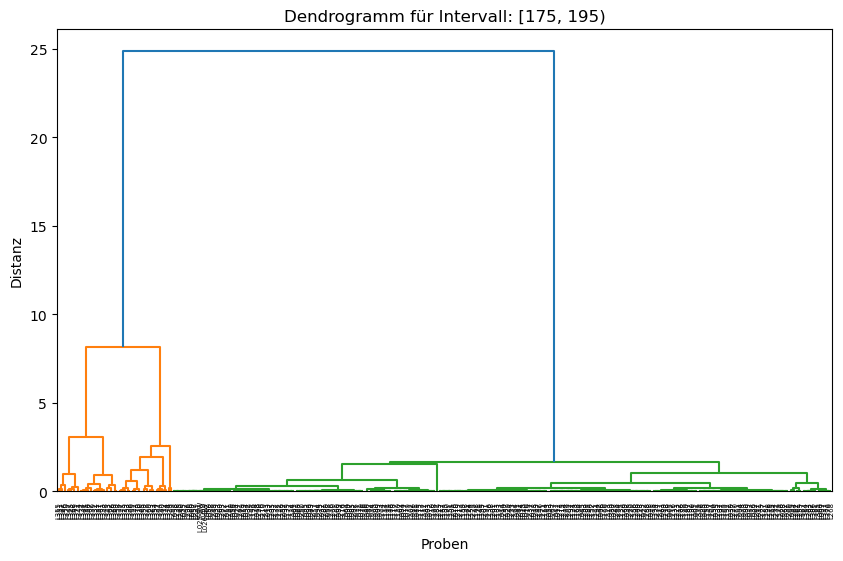

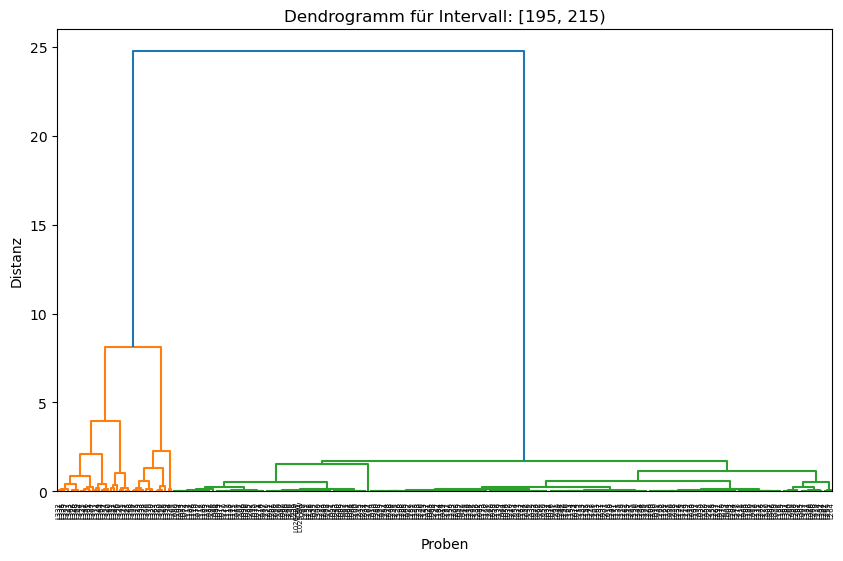

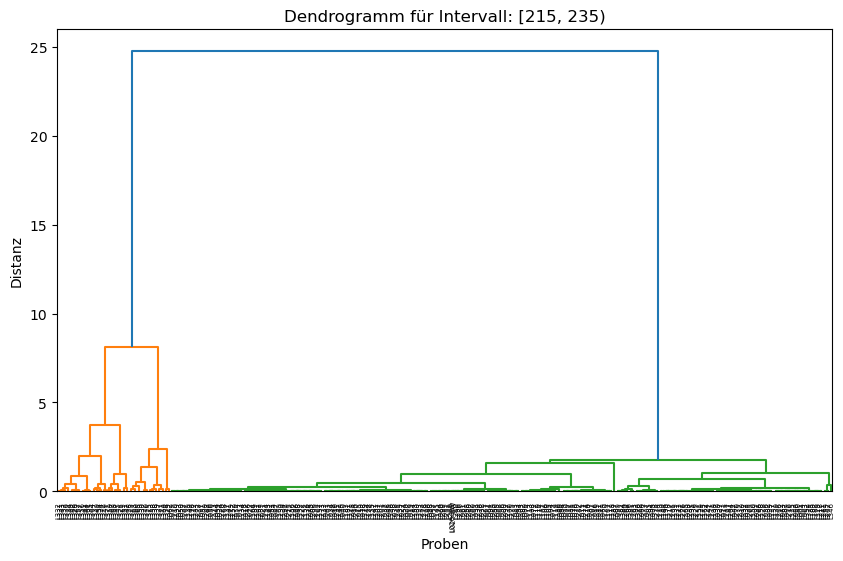

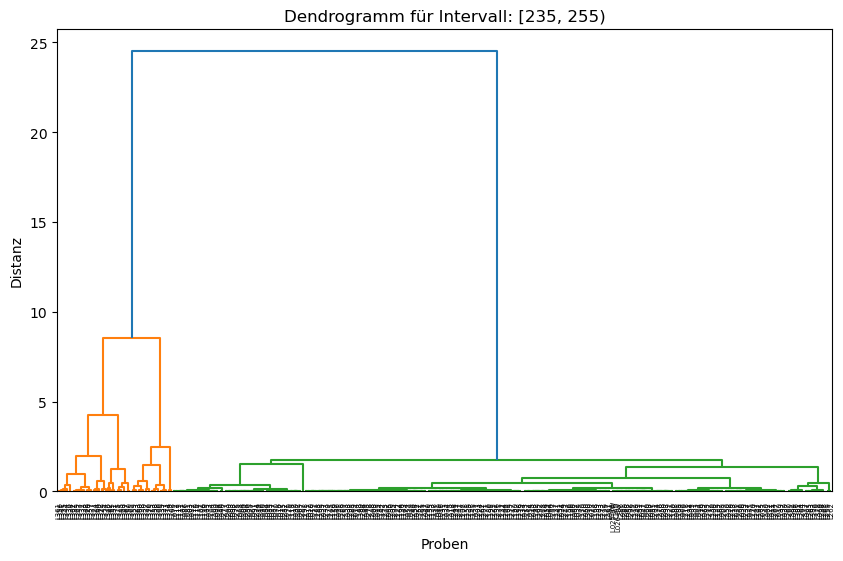

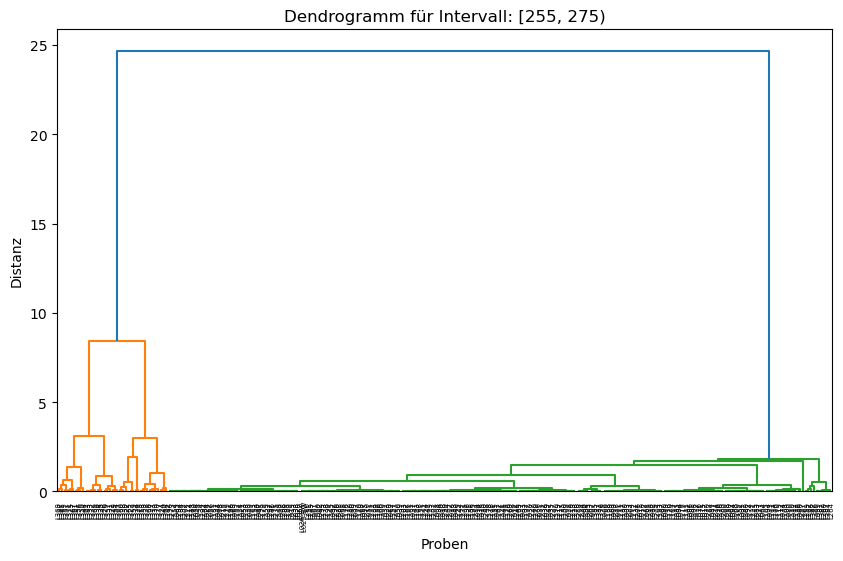

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Iteriere über jede Spalte (Intervall)
for column in df_normalized.columns:
    # Berechnung der Linkage-Matrix
    linked = linkage(df_normalized[[column]], method="ward", metric="euclidean")
    
    # Dendrogramm plotten
    plt.figure(figsize=(10, 6))
    dendrogram(linked, orientation="top", distance_sort="descending", labels=df_normalized.index)
    plt.title(f"Dendrogramm für Intervall: {column}")
    plt.xlabel("Proben")
    plt.ylabel("Distanz")
    plt.show()


In [36]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# DataFrame für Cluster-Zuweisungen initialisieren
cluster_results = pd.DataFrame(index=df_normalized.index)

# Iteriere über jede Spalte (Intervall)
for column in df_normalized.columns:
    # Hierarchisches Clustering für die aktuelle Spalte
    clustering = AgglomerativeClustering(n_clusters=6, metric="euclidean", linkage="ward")
    cluster_labels = clustering.fit_predict(df_normalized[[column]])
    
    # Speichere die Cluster-Zuweisung in den Ergebnissen
    cluster_results[column] = cluster_labels

# Ergebnisse anzeigen
cluster_results


,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)"
Probe,,,,,,,,,,,,,,,
L001,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
L002,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
L003,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
L004,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
L005,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
L384,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
L385,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [37]:
# DataFrame für Häufigkeiten initialisieren
cluster_value_counts = {}

# Iteriere über jede Spalte (Intervall)
for column in cluster_results.columns:
    # Berechne die Häufigkeit der Cluster-Zuweisungen
    value_counts = cluster_results[column].value_counts()
    
    # Speichere die Ergebnisse in einem Dictionary
    cluster_value_counts[column] = value_counts

# Konvertiere das Dictionary in einen DataFrame für bessere Übersicht
cluster_counts_df = pd.DataFrame(cluster_value_counts).fillna(0).astype(int)

# Ergebnisse anzeigen
cluster_counts_df

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)"
0,24,304,304,304,305,305,305,12,305,305,305,305,306,305,307
1,303,18,7,7,11,18,11,297,17,10,17,10,10,11,13
2,19,20,18,20,20,6,18,15,9,17,10,17,17,17,13
3,9,11,11,11,6,14,10,14,10,10,18,17,16,16,15
4,2,2,16,3,3,13,6,11,15,2,2,2,2,2,8
5,1,3,2,13,13,2,8,9,2,14,6,7,7,7,2


### übergeordnetes Clustering

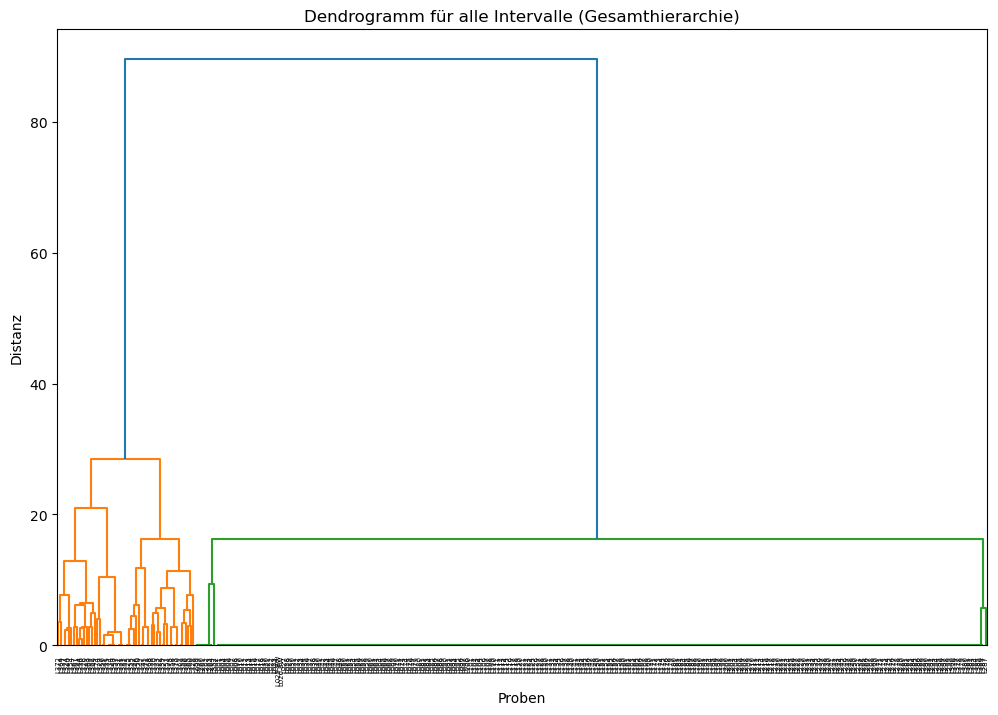

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Linkage-Matrix für hierarchisches Clustering auf allen Intervallen
linked = linkage(cluster_results.values, method="ward", metric="euclidean")

# Dendrogramm plotten
plt.figure(figsize=(12, 8))
dendrogram(
    linked,
    labels=cluster_results.index,  # Proben als Beschriftung
    orientation="top",
    distance_sort="descending"
)
plt.title("Dendrogramm für alle Intervalle (Gesamthierarchie)")
plt.xlabel("Proben")
plt.ylabel("Distanz")
plt.show()


In [39]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Konvertiere die Spaltennamen zu Strings
cluster_results.columns = cluster_results.columns.astype(str)

# Hierarchisches Clustering auf Basis aller Spalten (Intervalle)
clustering = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
overall_clusters = clustering.fit_predict(cluster_results.values)  # Nutze nur die Werte

# Ergebnisse als neue Spalte hinzufügen
cluster_results["Overall_Cluster"] = overall_clusters

# Ausgabe der Ergebnisse
cluster_results

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)",Overall_Cluster
Probe,,,,,,,,,,,,,,,,
L001,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
L002,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
L003,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
L004,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
L005,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L383,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
L384,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
L385,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [40]:
# Häufigkeiten der Cluster-Zuweisungen berechnen
cluster_counts = cluster_results["Overall_Cluster"].value_counts()
cluster_counts.sort_index()

Overall_Cluster
0    305
1     10
2     15
3     11
4     17
Name: count, dtype: int64

In [41]:
cluster_results.to_csv("data/072_interval_multiple_clustering.csv", index=True)